In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
 #for explainable
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

In [2]:
#data gathering - accessing file directory
data_path = 'C:/Users/raven/Downloads/xray'
train_path = 'C:/Users/raven/Downloads/xray/train'
test_path = 'C:/Users/raven/Downloads/xray/test'
os.listdir(train_path)

['Covid', 'Normal', 'Viral Pneumonia']

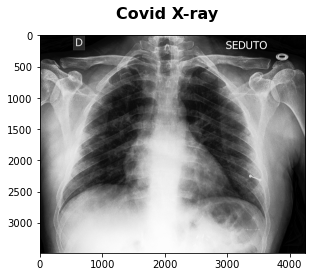

In [3]:
#checking directory if working
sample_covid = imread(train_path+"/Covid"+"/01.jpeg")
plt.imshow(sample_covid)
plt.suptitle('Covid X-ray', fontsize=16, weight='bold');

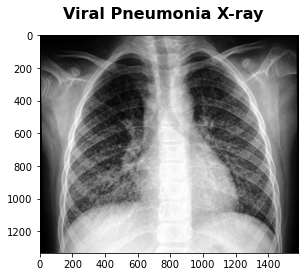

In [4]:
#checking directory if working
sample_pneumonia = imread(train_path+"/Viral Pneumonia"+"/01.jpeg")
plt.imshow(sample_pneumonia)
plt.suptitle('Viral Pneumonia X-ray', fontsize=16, weight='bold');

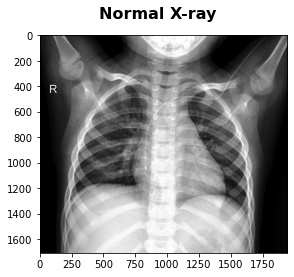

In [5]:
#checking directory if working
sample_normal = imread(train_path+"/Normal"+"/01.jpeg")
plt.imshow(sample_normal)
plt.suptitle('Normal X-ray', fontsize=16, weight='bold');

In [6]:
#Augment Data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [7]:
#Apply CNN
image_size = (224,224,3)

model_xray = Sequential()
model_xray.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model_xray.add(MaxPool2D())

model_xray.add(Conv2D( 128, (3,3), activation = "relu"))
model_xray.add(MaxPool2D())
model_xray.add(Dropout(0.2))

model_xray.add(Conv2D( 256,(3,3), activation = "relu"))
model_xray.add(MaxPool2D())
model_xray.add(Dropout(0.2))

model_xray.add(Conv2D( 512,(3,3), activation = "relu"))
model_xray.add(MaxPool2D())
model_xray.add(Dropout(0.2))


model_xray.add(Flatten())
model_xray.add(Dense(512, activation = "relu"))
model_xray.add(Dropout(0.15))

model_xray.add(Dense(3, activation = "softmax"))


model_xray.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model_xray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       2

In [8]:
#Fit the model
history = model_xray.fit(train_set, validation_data=test_set,steps_per_epoch = 15 ,epochs=60)

Epoch 1/60
15/15 [==============================] - 65s 4s/step - loss: 3.2925 - accuracy: 0.3777 - val_loss: 1.0963 - val_accuracy: 0.3846
Epoch 2/60
15/15 [==============================] - 57s 4s/step - loss: 1.0621 - accuracy: 0.4635 - val_loss: 1.0283 - val_accuracy: 0.5692
Epoch 3/60
15/15 [==============================] - 57s 4s/step - loss: 0.8192 - accuracy: 0.6438 - val_loss: 0.7417 - val_accuracy: 0.6923
Epoch 4/60
15/15 [==============================] - 58s 4s/step - loss: 0.5995 - accuracy: 0.7167 - val_loss: 0.7451 - val_accuracy: 0.6462
Epoch 5/60
15/15 [==============================] - 56s 4s/step - loss: 0.5592 - accuracy: 0.7811 - val_loss: 0.5897 - val_accuracy: 0.7538
Epoch 6/60
15/15 [==============================] - 58s 4s/step - loss: 0.5797 - accuracy: 0.7768 - val_loss: 0.5216 - val_accuracy: 0.7846
Epoch 7/60
15/15 [==============================] - 58s 4s/step - loss: 0.4671 - accuracy: 0.8069 - val_loss: 0.5669 - val_accuracy: 0.7846
Epoch 8/60
15/15 [==

15/15 [==============================] - 57s 4s/step - loss: 0.2864 - accuracy: 0.9099 - val_loss: 0.2817 - val_accuracy: 0.8769
Epoch 60/60
15/15 [==============================] - 57s 4s/step - loss: 0.2705 - accuracy: 0.9185 - val_loss: 0.4004 - val_accuracy: 0.8615


In [9]:
#See  accuracy value
print("The training accuracy is: ", history.history['accuracy'][-1])
print("The validation accuracy is: ", history.history['val_accuracy'][-1])

The training accuracy is:  0.9184549450874329
The validation accuracy is:  0.8615384697914124


<AxesSubplot:>

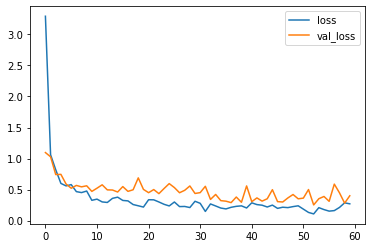

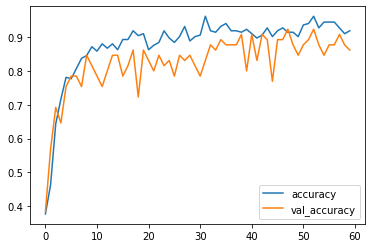

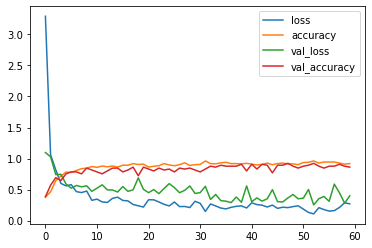

In [10]:
#Plot to see loss value
losses_xray = pd.DataFrame(history.history)
losses_xray.head()
losses_xray[['loss','val_loss']].plot() 
losses_xray[['accuracy','val_accuracy']].plot() 
losses_xray.plot()

In [11]:
#Use model h5 
model_xray.save('model.h5')

5/5 [==============================] - 5s 801ms/step


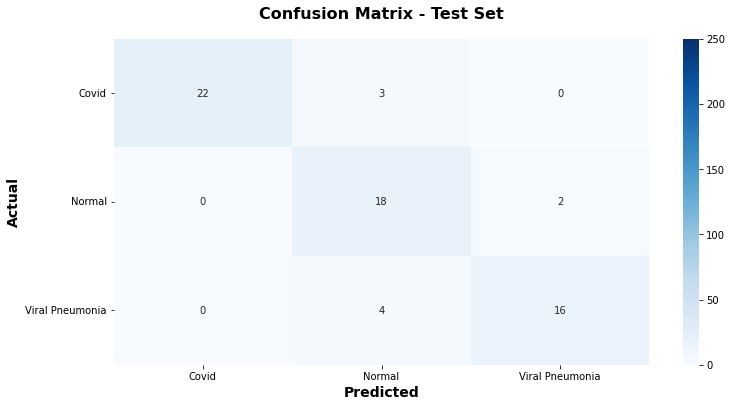

In [12]:
#Check the efficiency of the model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


classes = ["Covid", "Normal", "Viral Pneumonia"]

y_pred = model_xray.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [13]:
class_dict = {0:'Covid',
              1:'Normal',
              2:'Viral Pneumonia'}

1/1 [==============================] - 0s 279ms/step
prediction:  Covid


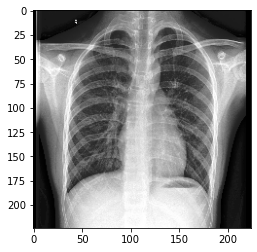

In [14]:
#Evaluate the model by using the validation dataset
evaluate_file_path =  '/validation/pic1.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 127ms/step
prediction:  Covid


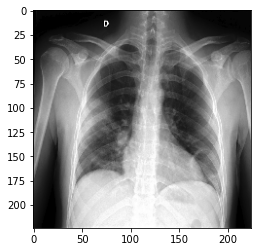

In [15]:
#Evaluate the model by using the validation dataset
evaluate_file_path =  '/validation/pic2.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 114ms/step
prediction:  Covid


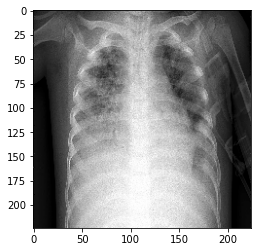

In [16]:
#Evaluate the model by using the validation dataset
evaluate_file_path =  '/validation/pic3.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 118ms/step
prediction:  Viral Pneumonia


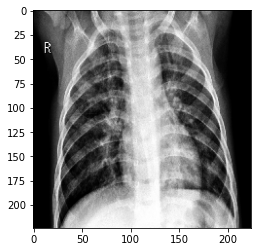

In [17]:
#Evaluate the model by using the validation dataset
evaluate_file_path =  '/validation/pic4.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 104ms/step
prediction:  Normal


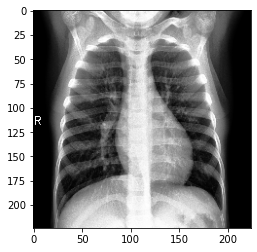

In [18]:
#Evaluate the model by using the validation dataset
evaluate_file_path =  '/validation/pic5.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 99ms/step
prediction:  Covid


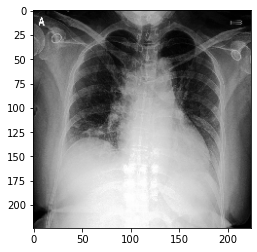

In [19]:
#Evaluate the model by using the validation dataset
evaluate_file_path =  '/validation/pic6.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 126ms/step
prediction:  Covid


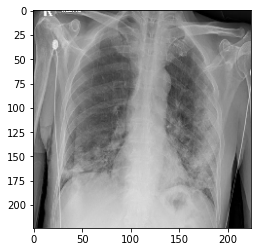

In [22]:
file_path =  '/validation/pic7.jpg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model_xray.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 99ms/step
prediction:  Covid


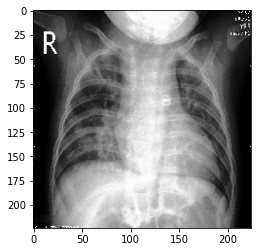

In [23]:
evaluate_file_path =  '/validation/pic8.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 111ms/step
prediction:  Covid


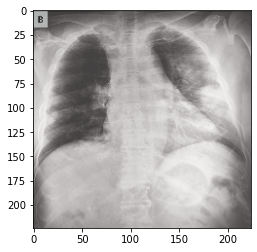

In [24]:
evaluate_file_path =  '/validation/pic9.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 115ms/step
prediction:  Covid


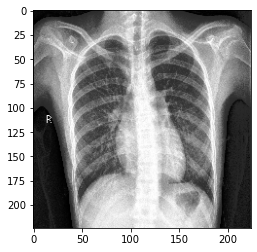

In [25]:
evaluate_file_path =  '/validation/pic10.jpeg'
evaluate_test_image = cv2.imread(data_path + evaluate_file_path)
evaluate_test_image= cv2.resize(evaluate_test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(evaluate_test_image)
evaluate_test_image = np.expand_dims(evaluate_test_image,axis=0)
probs = model_xray.predict(evaluate_test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

In [26]:
validation_result = {'': ['pic1', 'pic2', 'pic3', 'pic4', 'pic5', 'pic6', 'pic7', 'pic8', 'pic9', 'pic10'],
                'diagnosis_xray*': ['C', 'C', 'C', 'V', 'N', 'C', 'C', 'C', 'C', 'C']}

prediction = pd.DataFrame(validation_result, columns = ['', 'diagnosis_xray*'])

In [27]:
prediction.to_csv('agbayani_cnn_output_ex.csv', index=False)